In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("./datasets/bike_data.csv", index_col=0)

In [8]:
# Copy this to other notebooks to get the train and test data
def load_train_test():
    train_df = pd.read_csv("./datasets/bike_train.csv", index_col=0)
    test_df = pd.read_csv("./datasets/bike_test.csv", index_col=0)
    X_train = train_df.drop("Count", axis=1).values
    y_train = train_df["Count"]
    X_test = test_df.drop("Count", axis=1).values
    y_test = test_df["Count"]
    return (X_train, X_test, y_train, y_test)

## Train Test Split

In [9]:
X_train, X_test, y_train, y_test = load_train_test()

## Gradient Boosting Models

### ## Gradient Boosting Basic


In [10]:
from sklearn.metrics import r2_score

# Linear Regression Model basic
from sklearn.ensemble import GradientBoostingRegressor

LR = GradientBoostingRegressor()

reg = LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print("R2 score for gradient boosting: ", r2_score(y_test, y_pred))

R2 score for gradient boosting:  0.8351694758838946


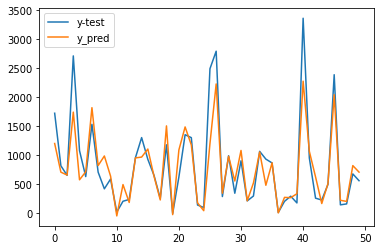

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
N = 50

plt.plot(list(y_test[:N]), label="y-test")
plt.plot(list(y_pred[:N]), label="y_pred")
plt.legend()
plt.show()

### Gradient Boosting Grid Search


In [12]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {  
            'max_features': range(1,22, 5),
            'max_depth': range(2,11,2),
    'learning_rate': np.linspace(0.1,0.4,6),
} 
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, verbose=3)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
print("R2 score for random forest (with grid search): ", r2_score(y_test, y_pred))

ing_rate=0.3400000000000001, max_depth=10, max_features=21, score=0.915, total=   1.7s
[CV] learning_rate=0.3400000000000001, max_depth=10, max_features=21 .
[CV]  learning_rate=0.3400000000000001, max_depth=10, max_features=21, score=0.909, total=   1.7s
[CV] learning_rate=0.3400000000000001, max_depth=10, max_features=21 .
[CV]  learning_rate=0.3400000000000001, max_depth=10, max_features=21, score=0.910, total=   1.8s
[CV] learning_rate=0.3400000000000001, max_depth=10, max_features=21 .
[CV]  learning_rate=0.3400000000000001, max_depth=10, max_features=21, score=0.912, total=   1.7s
[CV] learning_rate=0.3400000000000001, max_depth=10, max_features=21 .
[CV]  learning_rate=0.3400000000000001, max_depth=10, max_features=21, score=0.920, total=   1.7s
[CV] learning_rate=0.4, max_depth=2, max_features=1 ..................
[CV]  learning_rate=0.4, max_depth=2, max_features=1, score=0.672, total=   0.1s
[CV] learning_rate=0.4, max_depth=2, max_features=1 ..................
[CV]  learning

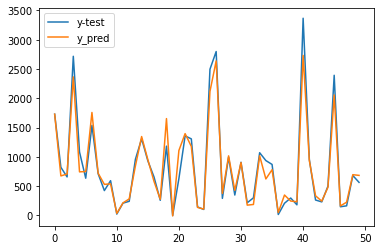

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
N = 50

plt.plot(list(y_test[:N]), label="y-test")
plt.plot(list(y_pred[:N]), label="y_pred")
plt.legend()
plt.show()

In [14]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'max_features': 16}

## Model Persistence

In [15]:
from joblib import dump, load
dump(LR, './models/gradient_boosting.joblib') 

['./models/gradient_boosting.joblib']